## Gerando dados

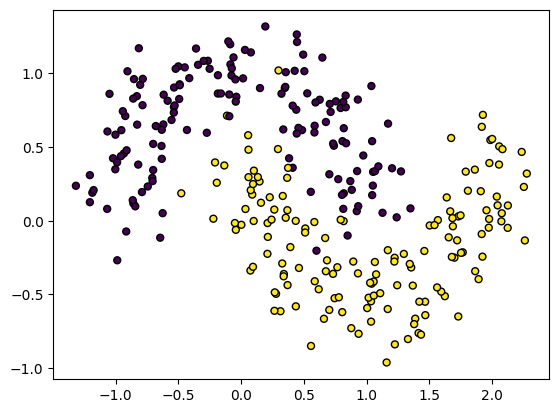

In [60]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
from sklearn.datasets import make_moons

np.random.seed(1)

# Gera dados em formato de lua
X, Y = make_moons(n_samples=300, noise=0.2)

# Plota os pontos gerados anteriormente
plt.scatter(X[:, 0], X[:, 1], marker='o', 
 c=Y, s=25, edgecolor='k')


## nn.Sequencial

nn.Sequencial e um conteiner que agrupa diversas camadas, e as executa em sequencia ao se executar um forward

In [61]:
# Parametros das camadas
in_size = 2
hidden_size = 8
out_size = 1

# Definicao do modelo, com cada uma de suas camadas
model = nn.Sequential(nn.Linear(in_features=in_size, out_features=hidden_size),
                      nn.ReLU(),
                      nn.Linear(in_features=hidden_size, out_features=out_size))

print(model)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


### Forward

In [62]:


tensor = torch.from_numpy(X).float()
pred = model(tensor)

# Resultado da eq da reta calculado para cada potno de X
print(pred)



tensor([[ 8.4528e-02],
        [ 9.5574e-02],
        [ 8.8383e-02],
        [ 7.4936e-02],
        [ 8.4246e-02],
        [ 6.4584e-02],
        [ 9.5855e-02],
        [ 9.7433e-02],
        [ 6.7365e-02],
        [ 8.9835e-02],
        [ 7.6534e-02],
        [-3.9100e-03],
        [ 5.0904e-02],
        [ 8.3779e-02],
        [ 9.8130e-02],
        [ 1.0916e-01],
        [ 4.6039e-02],
        [ 9.5375e-02],
        [ 7.4673e-02],
        [ 5.6600e-02],
        [ 8.6772e-02],
        [ 5.2068e-02],
        [ 9.5799e-02],
        [ 5.7505e-02],
        [ 9.9702e-02],
        [ 8.1329e-02],
        [ 5.5385e-02],
        [ 1.0749e-01],
        [ 6.4076e-02],
        [ 9.0706e-02],
        [ 6.9979e-02],
        [ 6.7605e-02],
        [ 6.6571e-02],
        [ 1.0647e-01],
        [ 8.2008e-02],
        [ 1.0967e-01],
        [ 1.0961e-01],
        [ 9.1631e-02],
        [ 1.0415e-01],
        [ 4.2068e-02],
        [ 6.9626e-02],
        [ 7.4266e-02],
        [ 4.9803e-02],
        [ 5

## nn.Module

Classe que agrupa camadas de uma rede neural e as executa em sequencia no forward

In [63]:
import torch.nn as nn
import torch.functional as F

class Modelo(nn.Module):

    def __init__(self, in_size, hidden_size, out_size):
        super(Modelo, self).__init__()

        self.hidden = nn.Linear(in_size, hidden_size)
        self.reLu = nn.ReLU()
        self.output = nn.Linear(hidden_size, out_size)

    def forward(self, X):
        hidden = self.reLu(self.hidden(X))
        output = self.output(hidden)

        return output

### Forward

In [64]:
in_size = 2
hidden_size = 8
out_size = 1

model = Modelo(in_size, hidden_size, out_size)
tensor = torch.from_numpy(X).float()
pred = model(tensor)

print(pred)


tensor([[-1.3129e-01],
        [-1.5934e-01],
        [-1.2660e-01],
        [-9.5812e-02],
        [-1.6007e-01],
        [-1.2871e-01],
        [-1.4162e-01],
        [-1.6309e-01],
        [ 5.0973e-03],
        [-6.9928e-02],
        [-1.6489e-02],
        [-1.5052e-01],
        [-7.9632e-05],
        [-1.2676e-01],
        [-1.7462e-01],
        [-1.8107e-01],
        [-4.2974e-02],
        [-1.1891e-01],
        [-9.3164e-02],
        [-5.8251e-02],
        [-1.0344e-01],
        [-1.1156e-01],
        [-5.5970e-02],
        [-5.5586e-02],
        [-1.8414e-01],
        [-8.8523e-02],
        [ 6.1100e-03],
        [-1.7204e-01],
        [-2.1185e-03],
        [-1.1890e-01],
        [-1.3428e-01],
        [-2.2511e-02],
        [-6.5310e-02],
        [-1.5338e-01],
        [-1.1330e-01],
        [-1.5986e-01],
        [-1.7663e-01],
        [-1.4237e-01],
        [-1.8524e-01],
        [-1.2446e-01],
        [-1.0642e-01],
        [-9.6305e-02],
        [-1.4409e-01],
        [-3

### Rodando na GPU

In [68]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)
in_size = 2
hidden_size = 8
out_size = 1

model = Modelo(in_size, hidden_size, out_size)
# Enviando o modelo para a gpu
model = model.to(device)

tensor = torch.from_numpy(X).float()
# Enviando o tensor para a gpu
tensor = tensor.to(device)

pred = model(tensor)

print(pred)

cpu
tensor([[0.5660],
        [0.5706],
        [0.5812],
        [0.6795],
        [0.5511],
        [0.4989],
        [0.6589],
        [0.8809],
        [1.0267],
        [0.8007],
        [0.8828],
        [0.3767],
        [1.1465],
        [0.9300],
        [0.6190],
        [0.8140],
        [0.9152],
        [0.6682],
        [0.6862],
        [0.8670],
        [0.7461],
        [0.4795],
        [0.8709],
        [0.8314],
        [0.6542],
        [0.7107],
        [1.1490],
        [0.8136],
        [0.9980],
        [0.6128],
        [0.5076],
        [0.8483],
        [0.7367],
        [0.7931],
        [0.8847],
        [0.7749],
        [0.7896],
        [0.6024],
        [0.7088],
        [0.6132],
        [0.6663],
        [0.6765],
        [0.5215],
        [0.8365],
        [0.8016],
        [0.6487],
        [0.7491],
        [0.5723],
        [0.7870],
        [0.6910],
        [0.7219],
        [1.0272],
        [1.1332],
        [0.6070],
        [1.1908],
      